<a href="https://colab.research.google.com/github/vishalkandukuri97/AI-ML-Projects/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
california = fetch_california_housing()

In [6]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection
selector = SelectKBest(score_func=f_regression, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)


In [10]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude'], dtype='object')


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test_selected)

In [13]:
print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


Linear Regression Results:
MSE: 0.6382565441555915
MAE: 0.5796603458789069
R2: 0.5129333248216975


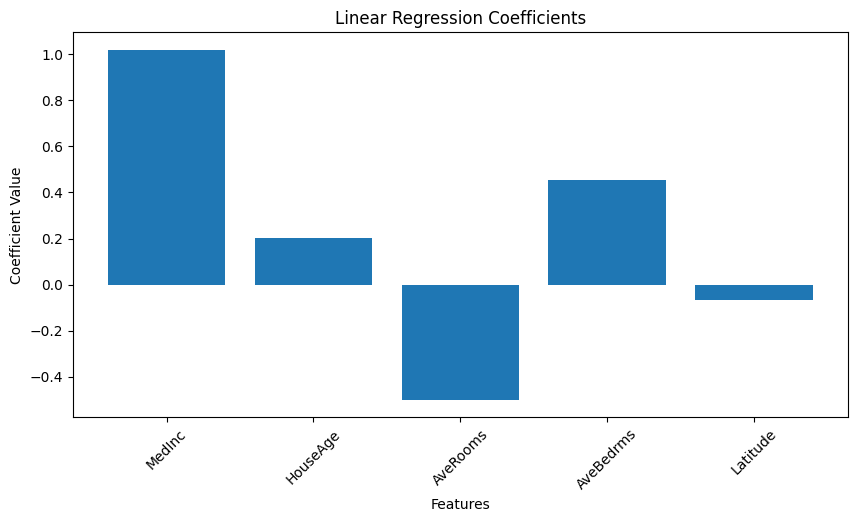

In [14]:
# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(selected_features, lr.coef_)
plt.title("Linear Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create pipeline
poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [16]:
poly_reg.fit(X_train, y_train)
y_pred = poly_reg.predict(X_test)

print("\nPolynomial Regression (degree=2) Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))



Polynomial Regression (degree=2) Results:
MSE: 0.4643015238301126
MAE: 0.4670009334696569
R2: 0.6456819729261978


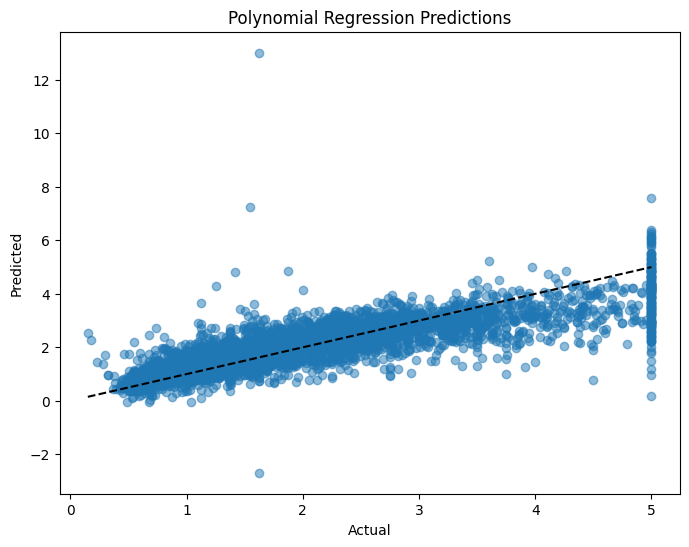

In [17]:
# Visualize predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial Regression Predictions")
plt.show()


In [18]:
from sklearn.linear_model import Lasso

# Parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso = Lasso(max_iter=10000)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_lasso = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_)
# Evaluate
y_pred = best_lasso.predict(X_test_scaled)

print("\nLasso Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

NameError: name 'GridSearchCV' is not defined